In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
A = pd.read_csv("/Users/user/Desktop/python/datasets/ts.csv", header=None)

In [2]:
A.head()

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
A.columns = ["Month","Passengers"]

In [4]:
A.head(50)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [5]:
A.Month = pd.to_datetime(A.Month)

In [6]:
A.index = A.Month

In [7]:
A

,Month,Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


In [8]:
A = A.drop("Month", axis = 1)

<AxesSubplot:xlabel='Month'>

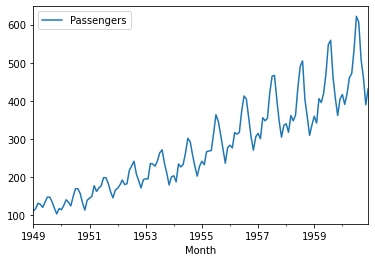

In [9]:

A.plot()

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
B = seasonal_decompose(A, model="multiplicative")

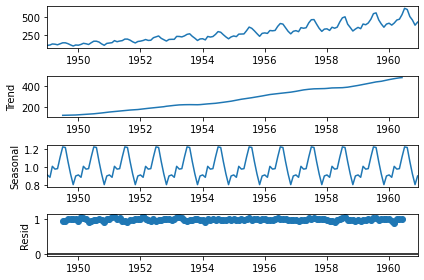

In [11]:
import matplotlib.pyplot as plt
B.plot()
plt.show()

# Test Of stationary

In [12]:
RMA = A.rolling(window=12).mean()

In [13]:
RMSTD = A.rolling(window=12).std()

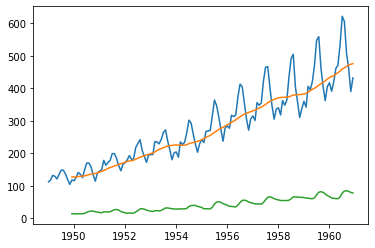

In [14]:

plt.plot(A)
plt.plot(RMA)
plt.plot(RMSTD)


# Convert TS into Stantionary

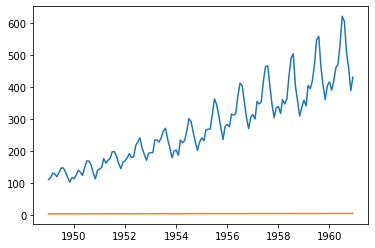

In [15]:
from numpy import log
plt.plot(A)
plt.plot(log(A))

# If u will see that it is fluctuating in plt.plot(log(A)) but not fluctuating with plt.plot(A)

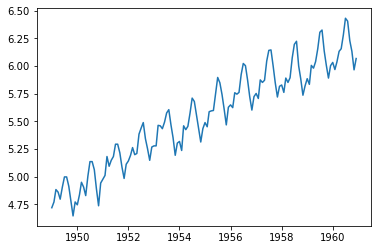

In [16]:
plt.plot(log(A))

In [17]:
RM_Log = log(A).rolling(window = 12).mean()

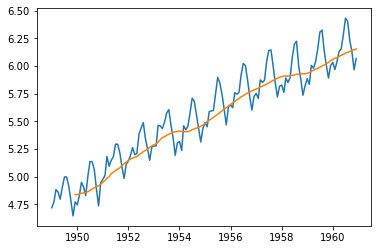

In [18]:
plt.plot(log(A))
plt.plot(RM_Log)

In [19]:
B = log(A)
C = B - RM_Log



# Difference Between Log(A) and ROlling mean of log(A)

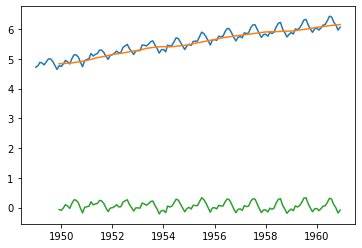

In [20]:
plt.plot(log(A))
plt.plot(RM_Log)
plt.plot(C)

# Divide data into training and testing set

In [21]:
C1 = C[C.Passengers.isnull() == False]

In [22]:
tr_n_rows = round(C1.shape[0]*0.8)
tr_n_rows

106

In [23]:
training_set = C1[0:106]
testing_set = C1[106:133]

In [24]:
testing_set.head(1)

,Passengers
Month,
1958-10-01,-0.045657


In [25]:
testing_set.tail(1)

,Passengers
Month,
1960-12-01,-0.085789



# Create a Predictive Model

In [26]:
from statsmodels.tsa.ar_model import AR
model = AR(training_set).fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [56]:
pred = model.predict(start="1958-07-01",end="1960-12-01")

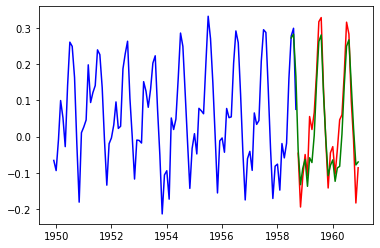

In [57]:
plt.plot(training_set, c = "blue")
plt.plot(testing_set, c = "red")
plt.plot(pred, c = "green")

In [58]:
Q=pd.DataFrame(pred, columns=['Passengers'])
Q

,Passengers
1958-07-01,0.271621
1958-08-01,0.282265
1958-09-01,0.165895
1958-10-01,-0.037129
1958-11-01,-0.132256
1958-12-01,-0.086974
1959-01-01,-0.062510
1959-02-01,-0.136801
1959-03-01,-0.058226
1959-04-01,-0.071314


In [59]:
import numpy as np


In [75]:
con_pred = np.exp(Q+RM_Log)

In [77]:
len(pred)

30

In [79]:
len(A)

144

In [82]:
pred = con_pred[114:]

In [83]:
pred

,Passengers
1958-07-01,488.455273
1958-08-01,496.911194
1958-09-01,442.323602
1958-10-01,362.074874
1958-11-01,329.665472
1958-12-01,345.022132
1959-01-01,355.254891
1959-02-01,331.825018
1959-03-01,362.397462
1959-04-01,361.557750
